<a href="https://colab.research.google.com/github/ahmetondermu/regressionColab/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
path = "/content/drive/MyDrive/maliciousornot.xlsx"

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
data = pd.read_excel(path)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [5]:
data.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


<Axes: >

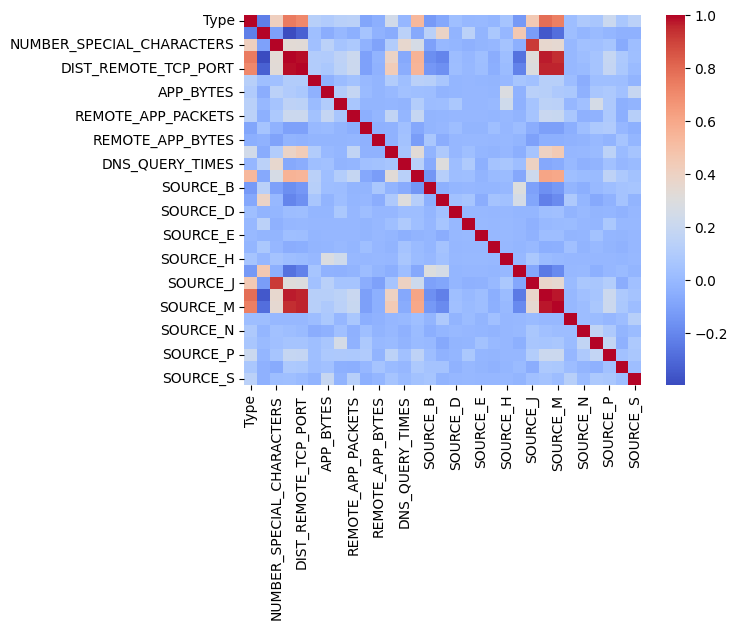

In [6]:
sns.heatmap(data.corr(), annot=False, cmap="coolwarm")

In [7]:
data.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

<Axes: xlabel='Type', ylabel='count'>

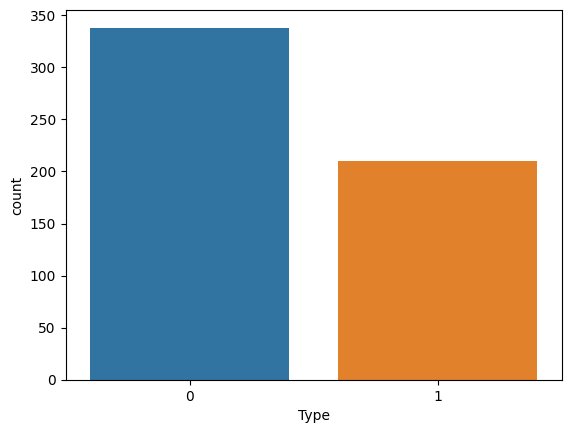

In [8]:
sns.countplot(x = "Type" , data = data)

<Axes: >

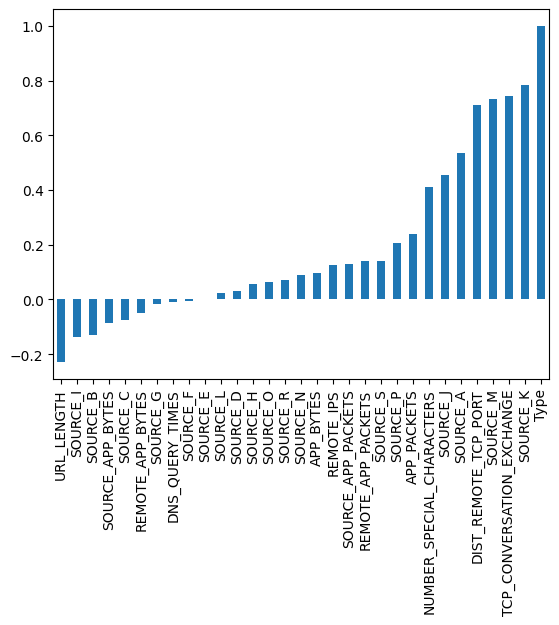

In [9]:
data.corr()["Type"].sort_values().plot(kind="bar")

In [10]:
y = data["Type"].values
x = data.drop("Type" , axis = 1).values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 , random_state=15)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(x_train)

MinMaxScaler()

In [16]:
x_train = scaler.transform(x_train)

In [17]:
x_test = scaler.transform(x_test)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
model = Sequential()

model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))

model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy" , optimizer = "adam")

In [20]:
model.fit(x = x_train , y = y_train , epochs= 700 , verbose = 1 , validation_data=(x_test,y_test) , batch_size=1)

Epoch 1/700
383/383 [==============================] - 3s 4ms/step - loss: 0.6456 - val_loss: 0.5770
Epoch 2/700
383/383 [==============================] - 1s 4ms/step - loss: 0.3813 - val_loss: 0.3474
Epoch 3/700
383/383 [==============================] - 1s 2ms/step - loss: 0.2166 - val_loss: 0.2805
Epoch 4/700
383/383 [==============================] - 1s 2ms/step - loss: 0.1648 - val_loss: 0.4202
Epoch 5/700
383/383 [==============================] - 1s 2ms/step - loss: 0.1461 - val_loss: 0.2412
Epoch 6/700
383/383 [==============================] - 1s 2ms/step - loss: 0.1348 - val_loss: 0.2376
Epoch 7/700
383/383 [==============================] - 1s 3ms/step - loss: 0.1168 - val_loss: 0.4449
Epoch 8/700
383/383 [==============================] - 1s 3ms/step - loss: 0.1234 - val_loss: 0.2246
Epoch 9/700
383/383 [==============================] - 1s 3ms/step - loss: 0.1035 - val_loss: 0.3643
Epoch 10/700
383/383 [==============================] - 1s 3ms/step - loss: 0.1037 - val_lo

In [21]:
modelLost = pd.DataFrame(model.history.history)

<Axes: >

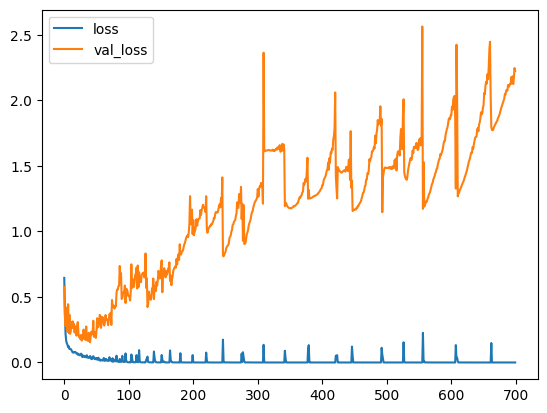

In [22]:
modelLost.plot()

In [23]:
model = Sequential()

model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))

model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy" , optimizer = "adam")

In [24]:
earlyStopping = EarlyStopping(monitor="val_loss" , mode = "min" ,verbose=1, patience = 25)

In [25]:
model.fit(x=x_train , y=y_train ,  , epochs = 700 , validation_data = (x_test , y_test) , verbose = 1,callbacks = [earlyStopping])

Epoch 1/700
12/12 [==============================] - 1s 21ms/step - loss: 0.6793 - val_loss: 0.6815
Epoch 2/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6604 - val_loss: 0.6706
Epoch 3/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6381 - val_loss: 0.6546
Epoch 4/700
12/12 [==============================] - 0s 8ms/step - loss: 0.6121 - val_loss: 0.6362
Epoch 5/700
12/12 [==============================] - 0s 7ms/step - loss: 0.5777 - val_loss: 0.6057
Epoch 6/700
12/12 [==============================] - 0s 8ms/step - loss: 0.5332 - val_loss: 0.5756
Epoch 7/700
12/12 [==============================] - 0s 8ms/step - loss: 0.4779 - val_loss: 0.5260
Epoch 8/700
12/12 [==============================] - 0s 7ms/step - loss: 0.4253 - val_loss: 0.4913
Epoch 9/700
12/12 [==============================] - 0s 8ms/step - loss: 0.3753 - val_loss: 0.4490
Epoch 10/700
12/12 [==============================] - 0s 7ms/step - loss: 0.3314 - val_loss: 0.4355
Epoch 11

<Axes: >

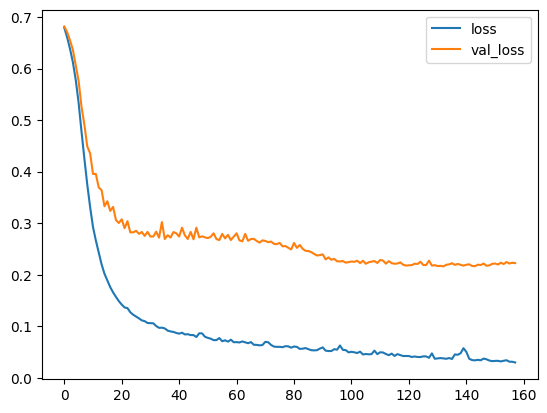

In [27]:
modelLost = pd.DataFrame(model.history.history)
modelLost.plot()

In [26]:
# Bitişi tam karar veremediğimizde earlyStopping ile otomatik traini durdurabiliriz

In [28]:
model = Sequential()

model.add(Dense(units = 30, activation = "relu"))
model.add(Dropout(0.6))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.6))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dropout(0.6))

model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy" , optimizer = "adam")

In [29]:
model.fit(x=x_train , y=y_train , epochs = 700 , validation_data = (x_test , y_test) , verbose = 1,callbacks = [earlyStopping])

Epoch 1/700
12/12 [==============================] - 2s 21ms/step - loss: 0.6919 - val_loss: 0.6973
Epoch 2/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6855 - val_loss: 0.6945
Epoch 3/700
12/12 [==============================] - 0s 6ms/step - loss: 0.6790 - val_loss: 0.6912
Epoch 4/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6817 - val_loss: 0.6877
Epoch 5/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6766 - val_loss: 0.6838
Epoch 6/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6602 - val_loss: 0.6811
Epoch 7/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6754 - val_loss: 0.6793
Epoch 8/700
12/12 [==============================] - 0s 5ms/step - loss: 0.6744 - val_loss: 0.6776
Epoch 9/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6654 - val_loss: 0.6756
Epoch 10/700
12/12 [==============================] - 0s 7ms/step - loss: 0.6537 - val_loss: 0.6737
Epoch 11

<Axes: >

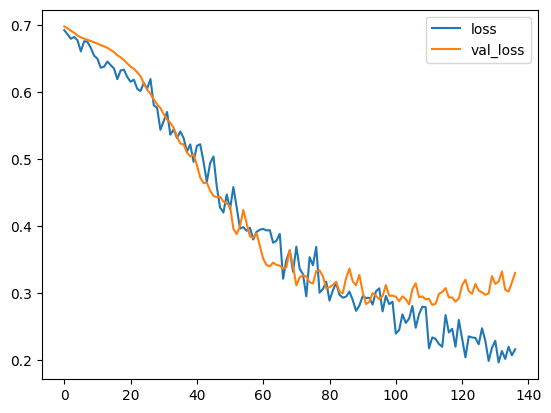

In [30]:
modelLost = pd.DataFrame(model.history.history)
modelLost.plot()

In [34]:
predictions = model.predict_step(x_test)
predictions

<tf.Tensor: shape=(165, 1), dtype=float32, numpy=
array([[9.73597616e-06],
       [9.96699393e-01],
       [4.12949082e-03],
       [9.88684237e-01],
       [1.81365176e-04],
       [9.73438919e-01],
       [5.39530674e-03],
       [1.72763482e-01],
       [9.26648498e-01],
       [1.66123323e-02],
       [3.17483917e-02],
       [1.63930967e-01],
       [5.72012993e-07],
       [7.79830758e-03],
       [9.95204210e-01],
       [8.60044479e-01],
       [3.67610570e-04],
       [3.81949663e-01],
       [7.85453769e-04],
       [8.80510926e-01],
       [9.40776885e-01],
       [4.06359788e-03],
       [9.54551995e-01],
       [3.80021363e-01],
       [9.98241425e-01],
       [8.72597396e-01],
       [9.90739167e-01],
       [7.85265584e-04],
       [1.04366576e-04],
       [9.93988454e-01],
       [1.91224962e-02],
       [7.74401633e-06],
       [8.73205245e-01],
       [9.88497078e-01],
       [1.26305514e-03],
       [1.39350436e-06],
       [7.13600889e-02],
       [1.05994837e-02],


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print (classification_report (y_test,predictions))

ValueError: ignored

In [37]:
print (confusion_matrix(y_test,predictions))

ValueError: ignored

In [38]:
veri = ("Ahmet",22)
type(veri)

tuple